# `vaex` @ SciPy (2019)
## New York Taxi Dataset (2009-2015): Exploratory Data Analysis and Machine Learning example

In [1]:
import vaex
from vaex.ui.colormaps import cm_plusmin
import warnings; warnings.simplefilter('ignore')

import pylab as plt
import numpy as np
import seaborn as sns

In [2]:
!ls -lh /data

total 1.5T
drwxr-xr-x 2 maartenbreddels maartenbreddels 4.0K Jul  5 05:04 airlines-us
-rw-r--r-- 1 maartenbreddels maartenbreddels 1.2T Jun 30 11:30 gaia-dr2-sort-by-source_id.hdf5
drwxr-xr-x 2 maartenbreddels maartenbreddels 4.0K Jul  6 14:11 GDELT
drwx------ 2 root            root             16K Jun 28 14:58 lost+found
drwxr-xr-x 2 maartenbreddels maartenbreddels 4.0K Jul  8 14:33 misc
-rwxrwxrwx 1 maartenbreddels maartenbreddels 108G May  2 09:16 yellow_taxi_2009_2015_f32.hdf5
-rwxrwxrwx 1 maartenbreddels maartenbreddels 164G Apr 12 16:31 yellow_taxi_2009_2015.hdf5
-rw-r--r-- 1 maartenbreddels maartenbreddels  12G Jul  6 20:03 yellow_taxi_2015_f32.hdf5


In [3]:
df_gaia = vaex.open('/data/gaia-dr2-sort-by-source_id.hdf5')

In [4]:
df_gaia

#,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper
0,1635721458409799680,b'Gaia DR2 4295806720',4295806720,833719442,2015.5,44.9961536841596,0.119381727827906,0.005615806210679649,0.12287249077395065,0.07144782399869501,0.16248493485095816,0.43971968,11.733411429340324,0.2431241681877592,-4.7759340851709,0.2389884371856387,0.022670548,0.27376112,-0.061221834,0.09342154,-0.43380169999999996,-0.10258209,-0.23457742,0.2862106,0.24838115,0.30606467,107,0,106,1,1.6358627000000001,125.30832,0.0,0.0,31,False,1.6281219999999998,1.6129292688600716,0.03975095740667449,0.026966427,13,10,0.25016737,0,13,False,103,1635.9507708728468,2.7757613305963007,589.3701,17.65394,10,785.6408778060331,8.304744041442405,94.601456,18.113329,11,1205.3932347369573,12.695619867587247,94.9456,17.059097,1.2170502,0,1.0542316,0.45938873,0.5948429000000001,nan,nan,0,nan,nan,nan,b'NOT_AVAILABLE',176.9510737567222,-48.901521688994805,42.5337243367526,-16.32957311107743,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1635721458409799680,b'Gaia DR2 34361129088',34361129088,1253687186,2015.5,45.00431616420765,0.13221516031053107,0.021045032689712983,0.15033009946029466,3.48677407917816,0.1943677537725032,17.939056,30.2997273525487,0.2890571540060363,20.102047674607906,0.2904121164006919,0.06490505,0.10328879,-3.8125843e-05,0.010977124,-0.5181503,-0.15682727,-0.25213727,0.25715247,0.36133286,0.21847394,97,0,97,0,3.1044097,139.97816,0.4393295485806768,2.2560181660871423,31,False,1.285051,1.3322381786391089,0.043729691466259976,0.030602371,11,9,0.29393765,0,11,False,96,1712.9128925457007,3.0338739347619077,564.59595,17.604027,11,397.3368347119427,13.369227259151073,29.720254999999998,18.85349,10,2155.4795941459947,8.25350128363993,261.15942,16.428060000000002,1.4903364,0,2.4254303,1.249464,1.1759663,nan,nan,0,nan,nan,nan,b'NOT_AVAILABLE',176.94278716312405,-48.88493841774036,42.54656815575859,-16.317213719979975,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1635721458409799680,b'Gaia DR2 38655544960',38655544960,1168973894,2015.5,45.004974244984105,0.029723176168001464,0.019877000365797717,0.0398615194906984,3.1212565825574363,0.04667520041451068,66.87184,29.669773387717747,0.07106567711614904,19.225962799772443,0.08279741152631212,0.11690165,0.2090516,-0.14794418,-0.082815714,-0.6151166,-0.4523399,-0.59776425,0.45273238,0.47702566,0.595477,104,0,104,0,-2.2898765,69.61933,0.0,0.0,31,False,

### Open the dataset

In [5]:
df = vaex.open('/data/yellow_taxi_2009_2015_f32.hdf5')

In [6]:
df

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.630000114440918,-73.99195861816406,40.72156524658203,nan,nan,-73.99380493164062,40.6959228515625,8.899999618530273,0.5,nan,0.0,0.0,9.399999618530273
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.550000190734863,-73.98210144042969,40.736289978027344,nan,nan,-73.95584869384766,40.768028259277344,12.100000381469727,0.5,nan,2.0,0.0,14.600000381469727
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.350000381469727,-74.0025863647461,40.73974609375,nan,nan,-73.86997985839844,40.770225524902344,23.700000762939453,0.0,nan,4.739999771118164,0.0,28.440000534057617
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5.0,-73.9742660522461,40.79095458984375,nan,nan,-73.9965591430664,40.731849670410156,14.899999618530273,0.5,nan,3.049999952316284,0.0,18.450000762939453
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4000000059604645,-74.00157928466797,40.719383239746094,nan,nan,-74.00837707519531,40.7203483581543,3.700000047683716,0.0,nan,0.0,0.0,3.700000047683716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,173,057,922",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2000000476837158,-73.99381256103516,40.72087097167969,1.0,0.0,-73.98621368408203,40.722469329833984,7.5,0.5,0.5,1.7599999904632568,0.0,10.5600004196167
"1,173,057,923",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527099609375,40.76028060913086,1.0,0.0,-73.93951416015625,40.75238800048828,7.5,0.5,0.5,0.0,0.0,8.800000190734863
"1,173,057,924",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.799999952316284,-73.98729705810547,40.739078521728516,1.0,0.0,-73.9886703491211,40.69329833984375,13.5,0.5,0.5,0.0,0.0,14.800000190734863
"1,173,057,925",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.9600000381469727,-73.99755859375,40.72569274902344,1.0,0.0,-74.01712036132812,40.705322265625,8.5,0.5,0.5,0.0,0.0,9.800000190734863


### Split the data into train & test sets

In [7]:
# Train / test split (by date)
magic_row_nr = 1_026_944_937

df_train, df_test = df[:magic_row_nr], df[magic_row_nr:]

print(f'Number of samples in the training set: {len(df_train):,}')
print(f'Number of samples in the test set    :   {len(df_test):,}')

Number of samples in the training set: 1,026,944,937
Number of samples in the test set    :   146,112,990


### Basic view in the contents of the data

In [8]:
# Basic description about the training dataset
df_train.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
dtype,str,datetime64[ns],datetime64[ns],int64,str,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
count,1026944937,1026944937,1026944937,1026944937,1026944937,1026944937,1026944937,1026944936,856048881,492801449,1026930442,1026937251,1026944936,1026944936,885904367,1026944936,1026944936,1026944936
NA,0,0,0,0,0,0,0,1,170896056,534143488,14495,7686,1,1,141040570,1,1,1
mean,--,1970-01-01T00:00:09.363074997,1970-01-01T00:00:17.117798649,1.6849674628660252,--,4.288778392070037,-72.49317243472606,39.909891063831154,1.0347555456941249,0.01978832452661883,-72.49243151212976,39.90885643799401,10.972378852412824,0.30212644001978256,0.49609965013291546,1.0442341037367961,0.1695658547649635,12.91901862688129
std,--,5.36654e+16,5.36655e+16,1.32989,--,3538.44,13.1757,9.98901,0.390535,0.139272,13.112,9.98311,675.441,0.372003,0.0709658,70.4219,947.702,1166.23
min,--,2009-01-01T00:00:27.365015552,2009-01-01T00:00:27.365015552,0,--,-2.14748e+07,-3509.02,-3579.14,0,0,-3579.14,-3579.14,-2.14748e+07,-19.5,-1,-1.67772e+06,-2.14748e+07,-2.14748e+07
max,--,2014-12-31T23:59:54.563395584,2015-01-01T00:59:27.976185856,255,--,1.62016e+07,3570.22,3577.14,252,2,3460.43,3577.14,158996,854.5,1311.22,938.02,5510.07,685908


### Remove missing data

In [9]:
# Drop NANs
df_train = df_train.dropna(column_names=['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude'])

### Abnormal number of passengers

In [10]:
# Number of passengers
# df_train.passenger_count.unique()
df_train.passenger_count.value_counts(progress=True)

[########################################]:  100.00% elapsed time  :        7s =  0.1m =  0.0h      
 

1      709330188
2      151963187
5       73984911
3       45300783
4       22002415
6       20490752
0        3870557
208         1515
7            196
9            183
8            132
49            26
10            17
255           10
129            7
213            4
250            3
65             3
15             2
58             2
33             2
169            1
37             1
36             1
34             1
25             1
19             1
17             1
193            1
13             1
         ...    
223            1
225            1
229            1
232            1
247            1
249            1
38             1
51             1
177            1
165            1
164            1
163            1
160            1
158            1
155            1
141            1
137            1
134            1
133            1
125            1
113            1
97             1
91             1
84             1
254            1
69             1
66             1
61            

In [11]:
# Filter abnormal number of passengers
df_train = df_train[(df_train.passenger_count>0) & (df_train.passenger_count<7)]

### Clean up distance values

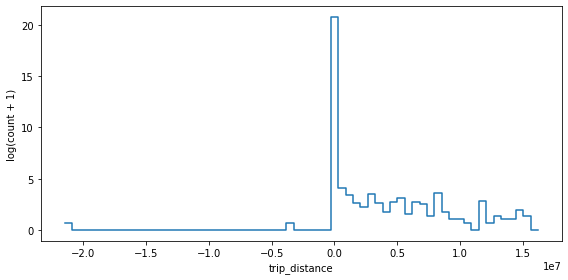

In [12]:
plt.figure(figsize=(8,4))
df_train.plot1d('trip_distance', limits='minmax', f='log1p')
plt.ylabel("log(count + 1)")
plt.show()

In [13]:
# What is the largest distance?
max_trip_distance = df_train.trip_distance.max()

print(f'{max_trip_distance:,} miles.')

moon_distance = 238_900
print(f'This is {int(max_trip_distance/moon_distance)} times larger than the distance between the Earth and the Moon!')

16,201,631.0 miles.
This is 67 times larger than the distance between the Earth and the Moon!


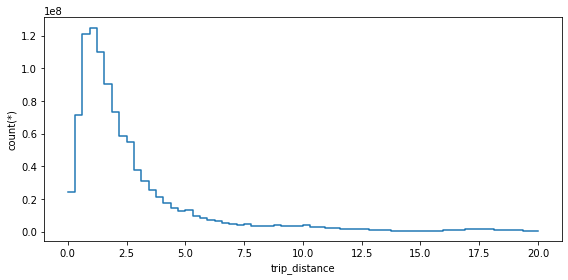

In [14]:
plt.figure(figsize=(8,4))
df_train.plot1d('trip_distance', limits=[0, 20])
plt.show()

In [15]:
# Filter negative and too large distances
df_train = df_train[(df_train.trip_distance>0) & (df_train.trip_distance<10)]

### What _is_ New York City really?

In [16]:
# Interactively plot the pickup locations
df_train.plot_widget(df_train.pickup_longitude, 
                     df_train.pickup_latitude, 
                     shape=512, 
                     f='log1p', 
                     colormap='plasma', 
                     limits='minmax')

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(scale=LinearScale(allo…

In [17]:
# Define the NYC boundaries
long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

In [18]:
# Make a selection based on the boundaries
df_train = df_train[(df_train.pickup_longitude > long_min)  & (df_train.pickup_longitude < long_max) & \
        (df_train.pickup_latitude > lat_min)    & (df_train.pickup_latitude < lat_max) & \
        (df_train.dropoff_longitude > long_min) & (df_train.dropoff_longitude < long_max) & \
        (df_train.dropoff_latitude > lat_min)   & (df_train.dropoff_latitude < lat_max)]

### Create some features

In [19]:
# ~10 min
# Speed (miles per hour)
df_train['trip_speed_mph'] = df_train.trip_distance / ((df_train.dropoff_datetime - df_train.pickup_datetime) / np.timedelta64(1, 'h'))

# Time in transit (minutes)
df_train['trip_duration_min'] = (df_train.dropoff_datetime - df_train.pickup_datetime) / np.timedelta64(1, 'm')

# fare divided by distance
df_train['fare_by_distance'] = (df_train.fare_amount / df_train.trip_distance)

### More filters: Trip duration

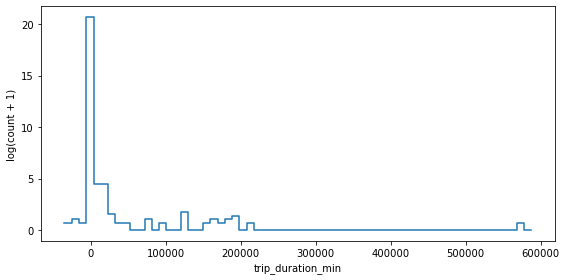

In [20]:
plt.figure(figsize=(8,4))
df_train.plot1d('trip_duration_min', f='log1p', limits='minmax')
plt.ylabel('log(count + 1)')
plt.show()

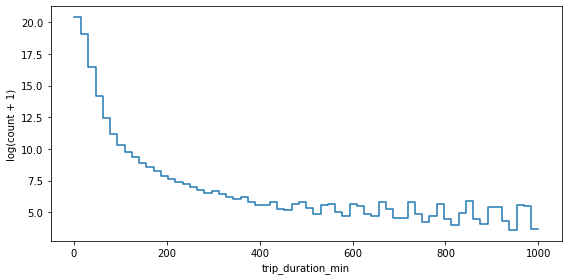

In [21]:
plt.figure(figsize=(8,4))
df_train.plot1d('trip_duration_min', f='log1p', limits=[0, 1000])
plt.ylabel('log(count + 1)')
plt.show()

In [22]:
# Filter, keep durations that are within 2 hours
df_train = df_train[(df_train.trip_duration_min>0) & (df_train.trip_duration_min<120)]

### Create some date/time features

In [23]:
# Daily activities
df_train['pu_hour'] = df_train.pickup_datetime.dt.hour
df_train['pu_day_of_week'] = df_train.pickup_datetime.dt.dayofweek
df_train['pu_month'] = df_train.pickup_datetime.dt.month - 1
df_train['pu_is_weekend'] = (df_train.pu_day_of_week>=5).astype('int')

# lists to help with the labeling
weekday_names_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
month_names_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [24]:
# Treat these columns as label/ordinal encoded values
df_train.categorize(column='pu_hour', labels=list(map(str, range(24))), check=False)
df_train.categorize(column='pu_day_of_week', labels=weekday_names_list, check=False)

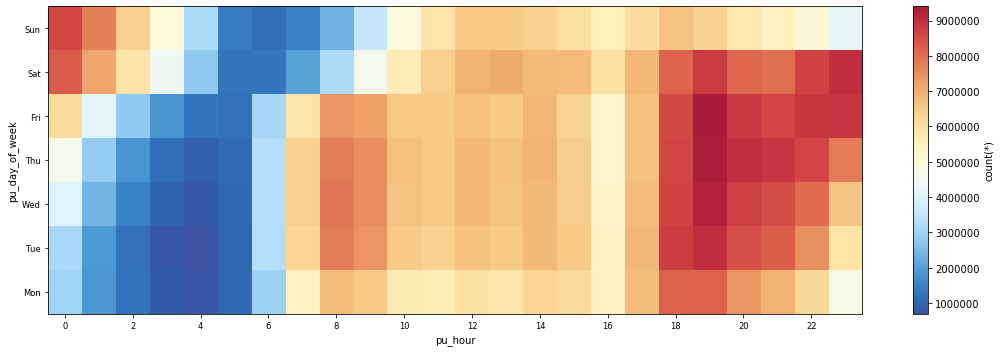

In [25]:
# Number of pick-ups per hour for a given day of the week
df_train.plot('pu_hour', 'pu_day_of_week', colorbar=True, colormap=cm_plusmin, figsize=(15, 5))

### Groupby examples

In [26]:
df_per_hour = df_train.groupby(by=df_train.pu_hour).agg({'fare_amount': 'mean',
                                                         'tip_amount': 'mean',
                                                         'fare_by_distance': 'mean',
                                                         'trip_duration_min': 'mean',
                                                         'trip_speed_mph': 'mean',
                                                        })

df_per_hour

#,pu_hour,fare_amount,tip_amount,fare_by_distance,trip_duration_min,trip_speed_mph
0,2,10.211934881322561,0.9653202177232485,4.903224868112311,10.361623022951044,16.580567918700567
1,3,10.396553061536146,0.9429588809372405,4.9145881316187925,10.322990892093824,17.201791052454865
2,20,9.342496378310404,0.9514066746457133,5.434164543277754,10.869877789357096,12.917273771821458
3,16,9.350331224522069,0.8136954720599692,6.305058755559683,11.633378962425596,11.548635743762416
4,22,9.832625659418472,0.9961083098504944,5.158878463139463,11.020842506015123,14.015983004164228
...,...,...,...,...,...,...
19,9,9.39878895012373,0.9129741018619918,6.17322610354181,11.885262218078733,11.016023795642779
20,19,9.259109789558263,0.9090468966556201,5.787258686850816,11.306965001996145,11.820609644087096
21,21,9.564354866778425,0.9490464573030534,5.2440779242053805,10.815552208683355,13.623586945820792
22,15,9.46888712558386,0.7864795243290498,6.343465923629452,12.115324543295163,10.78326894002907


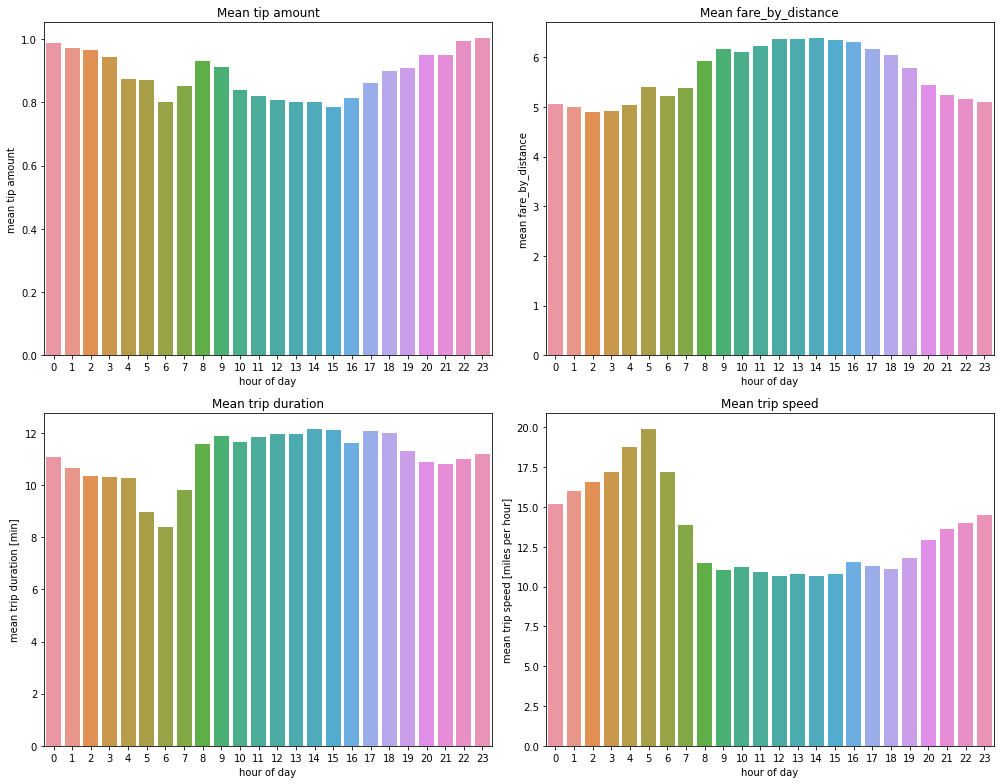

In [27]:
plt.figure(figsize=(14, 11))

plt.subplot(221)
sns.barplot(x=df_per_hour.pu_hour.values, y=df_per_hour.tip_amount.values)
plt.title('Mean tip amount')
plt.xlabel('hour of day')
plt.ylabel('mean tip amount')

plt.subplot(222)
sns.barplot(x=df_per_hour.pu_hour.values, y=df_per_hour.fare_by_distance.values)
plt.title('Mean fare_by_distance')
plt.xlabel('hour of day')
plt.ylabel('mean fare_by_distance')

plt.subplot(223)
sns.barplot(x=df_per_hour.pu_hour.values, y=df_per_hour.trip_duration_min.values)
plt.title('Mean trip duration')
plt.xlabel('hour of day')
plt.ylabel('mean trip duration [min]')

plt.subplot(224)
sns.barplot(x=df_per_hour.pu_hour.values, y=df_per_hour.trip_speed_mph.values)
plt.title('Mean trip speed')
plt.xlabel('hour of day')
plt.ylabel('mean trip speed [miles per hour]')


plt.tight_layout()
plt.show()

### Density Maps

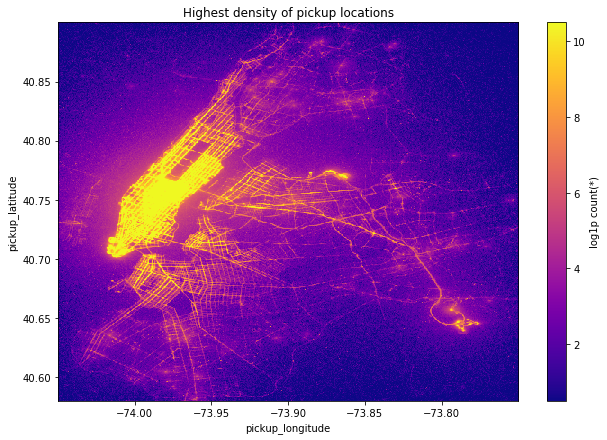

In [28]:
# Overall density map of pickup locations
plt.figure(figsize=(9, 6))
df_train.plot(df_train.pickup_longitude, df_train.pickup_latitude, 
              limits='minmax',
              colorbar=True, colormap='plasma', f='log1p', shape=512, vmin=0.5, vmax=10.5)
plt.title('Highest density of pickup locations')
plt.show()

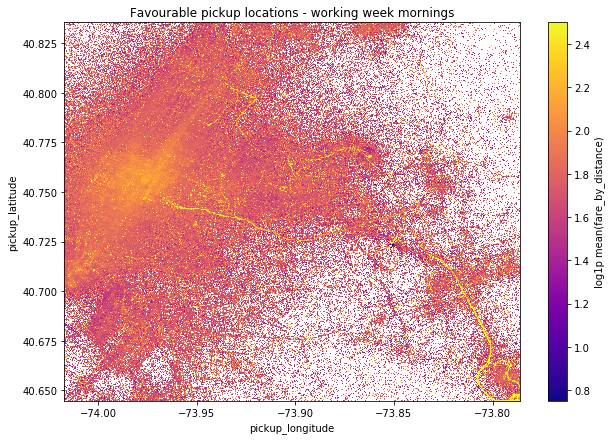

In [29]:
# Favourable pickup locations - best payout
plt.figure(figsize=(9, 6))
df_train.plot(df_train.pickup_longitude, df_train.pickup_latitude, what='mean(fare_by_distance)', 
              selection = '(pu_hour>=6) & (pu_hour<10) & (pu_day_of_week<5)',
              colorbar=True, colormap='plasma', f='log1p', shape=512, vmin=0.75, vmax=2.5)
plt.title('Favourable pickup locations - working week mornings')
plt.show()

In [30]:
# All the filtering, in case something went wrong
import vaex
import numpy as np
import pylab as plt
df = vaex.open('/data/yellow_taxi_2009_2015_f32.hdf5')
magic_row_nr = 1_026_944_937
df_train, df_test = df[:magic_row_nr], df[magic_row_nr:]
df_train = df_train.dropna(column_names=['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude'])
df_train = df_train[(df_train.passenger_count>0) & (df_train.passenger_count<7)]
df_train = df_train[(df_train.trip_distance>0) & (df_train.trip_distance<10)]
# Define the NYC boundaries
long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90
# Make a selection based on the boundaries
df_train = df_train[(df_train.pickup_longitude > long_min)  & (df_train.pickup_longitude < long_max) & \
        (df_train.pickup_latitude > lat_min)    & (df_train.pickup_latitude < lat_max) & \
        (df_train.dropoff_longitude > long_min) & (df_train.dropoff_longitude < long_max) & \
        (df_train.dropoff_latitude > lat_min)   & (df_train.dropoff_latitude < lat_max)]
df_train['pu_hour'] = df_train.pickup_datetime.dt.hour
df_train['pu_day_of_week'] = df_train.pickup_datetime.dt.dayofweek
df_train['pu_month'] = df_train.pickup_datetime.dt.month - 1
df_train['pu_is_weekend'] = (df_train.pu_day_of_week>=5).astype('int')
df_train['trip_speed_mph'] = df_train.trip_distance / ((df_train.dropoff_datetime - df_train.pickup_datetime) / np.timedelta64(1, 'h'))
df_train['trip_duration_min'] = (df_train.dropoff_datetime - df_train.pickup_datetime) / np.timedelta64(1, 'm')
df_train['fare_by_distance'] = (df_train.fare_amount / df_train.trip_distance)


## Predictive modelling example: predict the likely duration of a taxi trip

In [31]:
# ~15 min
import vaex.ml

In [32]:
# arc-distance in miles
def arc_distance(theta_1, phi_1, theta_2, phi_2):
    temp = (np.sin((theta_2-theta_1)/2*np.pi/180)**2
           + np.cos(theta_1*np.pi/180)*np.cos(theta_2*np.pi/180) * np.sin((phi_2-phi_1)/2*np.pi/180)**2)
    distance = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1-temp))
    return distance * 3958.8

# Add the arc-distance in miles as a virtual column
df_train['arc_distance_miles_numpy'] = arc_distance(df_train.pickup_longitude, df_train.pickup_latitude, 
                                              df_train.dropoff_longitude, df_train.dropoff_latitude)

In [33]:
df_train.arc_distance_miles_numpy.expand()

Expression = ((2 * arctan2(sqrt(((sin(((((dropoff_longitude - pickup_l...
Length: 948,361,550 dtype: float32 (expression)
-----------------------------------------------
        0    0.504949
        1     1.91233
        2     1.90838
        3    0.470047
        4    0.386479
         ...         
948361545    0.591804
948361546  0.00361373
948361547     1.83866
948361548    0.480429
948361549    0.720332

In [34]:
df_train['arc_distance_miles_numpy'].sum(progress=True)

[########################################]:  100.00% elapsed time  :       19s =  0.3m =  0.0h      
 

array(8.325162e+08, dtype=float32)

In [35]:
df_train['arc_distance_miles_cuda'] = df_train['arc_distance_miles_numpy'].jit_cuda()

In [36]:
df_train['arc_distance_miles_cuda'].sum(progress =True)

[########################################]:  100.00% elapsed time  :        4s =  0.1m =  0.0h                         
 

array(8.274489e+08, dtype=float32)

In [37]:
# df_train['arc_distance_miles'] = df_train['arc_distance_miles_cuda']
df_train['arc_distance_miles'] = df_train['arc_distance_miles_numpy']

In [38]:
# direction of travel in degrees
def direction_angle(theta_1, phi_1, theta_2, phi_2):
    dtheta = theta_2 - theta_1
    dphi = phi_2 - phi_1
    radians = np.arctan2(dtheta, dphi)
    return np.rad2deg(radians)

df_train['direction_angle_numpy'] = direction_angle(df_train.pickup_longitude, df_train.pickup_latitude, 
                                           df_train.dropoff_longitude, df_train.dropoff_latitude)

In [39]:
df_train['direction_angle'] = df_train['direction_angle_numpy'].jit_numba()

In [40]:
# Examine the train DataFrame at this point 
df_train.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pu_hour,pu_day_of_week,pu_month,pu_is_weekend,trip_speed_mph,trip_duration_min,fare_by_distance,arc_distance_miles_numpy,arc_distance_miles_cuda,arc_distance_miles,direction_angle_numpy,direction_angle
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4,2,6,0,1,15.78,10,3.38403,0.504949,0.504949,0.504949,-175.882,-175.882
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6,3,6,0,1,39,7,2.65934,1.91233,1.91233,1.91233,39.5963,39.5963
2,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45,20,3,0,0,14.2631,21.0333,2.98,1.90838,1.90838,1.90838,-159.335,-159.335
3,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7,16,5,0,1,3.66412,6.55,9.25,0.470047,0.470047,0.470047,-81.9194,-81.9194
4,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6,22,4,0,0,9.47368,7.6,5.08333,0.386479,0.386479,0.386479,155.526,155.526


### Encoding and transforming of features

In [41]:
# PCA of the pickup and dropoff locations - helps to "straighten out" the coordinates

# pickup transformations
pca_pu = vaex.ml.PCA(features=['pickup_longitude', 'pickup_latitude'], n_components=2)
df_train = pca_pu.fit_transform(df_train)

# dropoff transformations
pca_do = vaex.ml.PCA(features=['dropoff_longitude', 'dropoff_latitude'], n_components=2)
df_train = pca_do.fit_transform(df_train)

In [42]:
df_train.PCA_0.expand().expression

'(((pickup_longitude - -73.97901769343977) * -0.7111215386597552) + ((pickup_latitude - 40.7521551304845) * -0.7030690984918784))'

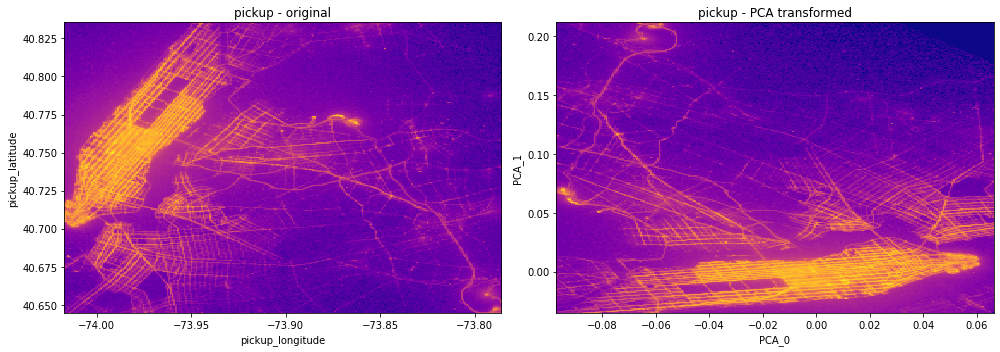

In [43]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.title('pickup - original')
df_train.plot(df_train.pickup_longitude, df_train.pickup_latitude,
           colormap='plasma', f='log1p', shape=256, colorbar=False)

plt.subplot(122)
plt.title('pickup - PCA transformed')
df_train.plot(df_train.PCA_0, df_train.PCA_1,
           colormap='plasma', f='log1p', shape=256, colorbar=False)

plt.tight_layout()
plt.show()

In [44]:
df_train.payment_type.value_counts(progress=True)

[########################################]:  100.00% elapsed time  :        7s =  0.1m =  0.0h 
 

CSH          358361815
CRD          346107157
CASH          65253102
Cash          53176177
Credit        39074537
CAS           28718557
Cre           25177276
Cas           24679128
CRE            3087663
CREDIT         2078369
UNK             960802
NOC             797653
No Charge       366724
DIS             257276
No              141297
Dispute          66152
Dis              29321
NA               28544
dtype: int64

In [45]:
# Inspect the payment_type
df_train.payment_type.str.lower().value_counts(progress=True)

[########################################]:  100.00% elapsed time  :       10s =  0.2m =  0.0h  
 

csh          358361815
crd          346107157
cash         118429279
cas           53397685
credit        41152906
cre           28264939
unk             960802
noc             797653
no charge       366724
dis             286597
no              141297
dispute          66152
na               28544
dtype: int64

Inspect the _payment_\__type_
From the documentation provided:
    - 1 = Credit card
    - 2 = Cash
    - 3 = No charge
    - 4 = Dispute
    - 5 = Unknown
    - 6 = Voided trip

In [46]:
# Define a mapping dictionary
# map_payment_type = {'csh': 2, 'crd': 1, 'cash': 2, '1': 1, 'cas': 2, '2': 2, 'credit': 1, 'cre': 1, 'unk': 5, 
#                     'noc': 3, 'no charge': 3, '3':3, 'dis': 4, 'no ': 3, '4': 4, 'dispute': 4, 'na ': 5, '5':5}
map_payment_type = {'csh': 2, 'crd': 1, 'cash': 2, 'cas': 2, 'credit': 1, 'cre': 1, 'unk': 5, 
                    'noc': 3, 'no charge': 3, 'dis': 4, 'no ': 3, 'dispute': 4, 'na ': 5}

df_train['payment_type_'] = df_train.payment_type.str.lower().map(map_payment_type, 
                                                                  default_value=-1, 
                                                                  allow_missing=True)

In [47]:
# inspect the DataFrame
df_train.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pu_hour,pu_day_of_week,pu_month,pu_is_weekend,trip_speed_mph,trip_duration_min,fare_by_distance,arc_distance_miles_numpy,arc_distance_miles_cuda,arc_distance_miles,direction_angle_numpy,direction_angle,PCA_0,PCA_1,PCA_2,PCA_3,payment_type_
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4,2,6,0,1,15.78,10,3.38403,0.504949,0.504949,0.504949,-175.882,-175.882,0.0307084,0.0126559,-0.0546097,-0.0217739,2
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6,3,6,0,1,39,7,2.65934,1.91233,1.91233,1.91233,39.5963,39.5963,0.0133463,0.00911512,0.0255345,-0.0070511,1
2,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45,20,3,0,0,14.2631,21.0333,2.98,1.90838,1.90838,1.90838,-159.335,-159.335,-0.0306586,-0.0242492,-0.0280676,0.00259482,1
3,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7,16,5,0,1,3.66412,6.55,9.25,0.470047,0.470047,0.470047,-81.9194,-81.9194,0.039084,0.0074436,-0.0444132,0.00477759,2
4,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6,22,4,0,0,9.47368,7.6,5.08333,0.386479,0.386479,0.386479,155.526,155.526,0.0197298,0.00461168,-0.0267204,-0.0110194,2


### Setting up the predictor - `LightGBM`

In [48]:
features_lgbm = ['passenger_count', 'trip_distance', 'rate_code', 'pu_hour', 'pu_day_of_week', 'pu_is_weekend', 
                 'arc_distance_miles', 'direction_angle', 'PCA_0', 'PCA_1', 'PCA_2', 'PCA_3', 'payment_type_']


# the target
target = 'trip_duration_min'

In [49]:
# Import the modeling library
import vaex.ml.lightgbm # vaex.ml also supports XGBoost, CatBoost, scikit-learn, annoy, more to come)

In [50]:
# parameters - standard lightgbm options
params = {
    'learning_rate': 0.1,       
    'max_depth': 5,             
    'colsample_bytree': 0.8,
    'subsample': 0.8,           
    'reg_lambda': 1,            
    'reg_alpha': 0,             
    'min_child_weight': 1,      
    'objective': 'regression',  
    'random_state': 42,         
    'n_jobs': -1} 

# Instantiate the model object
booster = vaex.ml.lightgbm.LightGBMModel(features=features_lgbm, params=params, num_boost_round=100)

# Take small part of the training set to we can do the training in real time fast
df_train_mini = df_train[:1_000_000]

# Fit the model object
booster.fit(df_train_mini, target=target)

print('Training completed!')

Training completed!


In [51]:
# Check performance on the training set - in reality one needs to do proper (x)-validation

# Classical predict - get an in-memory array of the predictions
pred = booster.predict(df_train_mini)

# view the predictions
display(pred)

# Create a virtual column housing the predictions
df_train = booster.transform(df_train)

# view the DataFrame
df_train.head(5)

array([10.75153894, 13.01583301, 19.69704542, ..., 12.03336585,
       16.81047214,  8.00301586])

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pu_hour,pu_day_of_week,pu_month,pu_is_weekend,trip_speed_mph,trip_duration_min,fare_by_distance,arc_distance_miles_numpy,arc_distance_miles_cuda,arc_distance_miles,direction_angle_numpy,direction_angle,PCA_0,PCA_1,PCA_2,PCA_3,payment_type_,lightgbm_prediction
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4,2,6,0,1,15.78,10,3.38403,0.504949,0.504949,0.504949,-175.882,-175.882,0.0307084,0.0126559,-0.0546097,-0.0217739,2,10.7515
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6,3,6,0,1,39,7,2.65934,1.91233,1.91233,1.91233,39.5963,39.5963,0.0133463,0.00911512,0.0255345,-0.0070511,1,13.0158
2,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45,20,3,0,0,14.2631,21.0333,2.98,1.90838,1.90838,1.90838,-159.335,-159.335,-0.0306586,-0.0242492,-0.0280676,0.00259482,1,19.697
3,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7,16,5,0,1,3.66412,6.55,9.25,0.470047,0.470047,0.470047,-81.9194,-81.9194,0.039084,0.0074436,-0.0444132,0.00477759,2,4.16012
4,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6,22,4,0,0,9.47368,7.6,5.08333,0.386479,0.386479,0.386479,155.526,155.526,0.0197298,0.00461168,-0.0267204,-0.0110194,2,7.90169


In [52]:
# df_train[['lightgbm_prediction', target]].head()

### Second estimator?!

In [53]:
# One hot encoding of categorical features
one_hot_enc = vaex.ml.OneHotEncoder(features=['payment_type_', 
                                              'pu_hour', 'pu_day_of_week', 'pu_month'], prefix='onehot_')

df_train = one_hot_enc.fit_transform(df_train)

In [54]:
# Standard scale some of the numerical features
standard_scaler = vaex.ml.StandardScaler(features=['arc_distance_miles', 'direction_angle', 'trip_distance'])
df_train = standard_scaler.fit_transform(df_train)

In [55]:
# View the training DataFrame now
df_train.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pu_hour,pu_day_of_week,pu_month,pu_is_weekend,trip_speed_mph,trip_duration_min,fare_by_distance,arc_distance_miles_numpy,arc_distance_miles_cuda,arc_distance_miles,direction_angle_numpy,direction_angle,PCA_0,PCA_1,PCA_2,PCA_3,payment_type_,lightgbm_prediction,onehot_payment_type__1,onehot_payment_type__2,onehot_payment_type__3,onehot_payment_type__4,onehot_payment_type__5,onehot_pu_hour_0,onehot_pu_hour_1,onehot_pu_hour_2,onehot_pu_hour_3,onehot_pu_hour_4,onehot_pu_hour_5,onehot_pu_hour_6,onehot_pu_hour_7,onehot_pu_hour_8,onehot_pu_hour_9,onehot_pu_hour_10,onehot_pu_hour_11,onehot_pu_hour_12,onehot_pu_hour_13,onehot_pu_hour_14,onehot_pu_hour_15,onehot_pu_hour_16,onehot_pu_hour_17,onehot_pu_hour_18,onehot_pu_hour_19,onehot_pu_hour_20,onehot_pu_hour_21,onehot_pu_hour_22,onehot_pu_hour_23,onehot_pu_day_of_week_0,onehot_pu_day_of_week_1,onehot_pu_day_of_week_2,onehot_pu_day_of_week_3,onehot_pu_day_of_week_4,onehot_pu_day_of_week_5,onehot_pu_day_of_week_6,onehot_pu_month_0,onehot_pu_month_1,onehot_pu_month_2,onehot_pu_month_3,onehot_pu_month_4,onehot_pu_month_5,onehot_pu_month_6,onehot_pu_month_7,onehot_pu_month_8,onehot_pu_month_9,onehot_pu_month_10,onehot_pu_month_11,standard_scaled_arc_distance_miles,standard_scaled_direction_angle,standard_scaled_trip_distance
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4,2,6,0,1,15.78,10,3.38403,0.504949,0.504949,0.504949,-175.882,-175.882,0.0307084,0.0126559,-0.0546097,-0.0217739,2,10.7515,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.613587,-1.56043,0.190003
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6,3,6,0,1,39,7,2.65934,1.91233,1.91233,1.91233,39.5963,39.5963,0.0133463,0.00911512,0.0255345,-0.0070511,1,13.0158,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0.490907,0.537372,1.22551
2,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45,20,3,0,0,14.2631,21.0333,2.98,1.90838,1.90838,1.90838,-159.335,-159.335,-0.0306586,-0.0242492,-0.0280676,0.00259482,1,19.697,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.487807,-1.39933,1.46821
3,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7,16,5,0,1,3.66412,6.55,9.25,0.470047,0.470047,0.470047,-81.9194,-81.9194,0.039084,0.0074436,-0.0444132,0.00477759,2,4.16012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.640978,-0.645653,-1.0127
4,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6,22,4,0,0,9.47368,7.6,5.08333,0.386479,0.386479,0.386479,155.526,155.526,0.0197298,0.00461168,-0.0267204,-0.0110194,2,7.90169,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.70656,1.66602,-0.581235


In [56]:
# Try a linear model
import vaex.ml.sklearn
from sklearn.linear_model import LinearRegression

In [57]:
# Specify which features to use
features_linear = ['PCA_0', 'PCA_1', 'PCA_2', 'PCA_3', 'pu_is_weekend'] + \
                  [feature for feature in df_train.get_column_names() if 'standard_scaled_' in feature] + \
                  [feature for feature in df_train.get_column_names() if 'onehot_' in feature]

In [58]:
# Instantiate the vaex-sklearn model 
linear_model = vaex.ml.sklearn.SKLearnPredictor(model=LinearRegression(copy_X=False, n_jobs=-1), 
                                                features=features_linear, prediction_name='linear_prediction')

# Agaim, take small part of the training so we can train in real time.
df_train_mini = df_train[:1_000_000]


# Fit the model object
linear_model.fit(df_train_mini, target=target)

print('Training completed!')

Training completed!


In [59]:
# Check performance on the training set - in reality one needs to do proper (x)-validation

# Classical predict - get an in-memory array of the predictions
pred_linear = linear_model.predict(df_train_mini)

# view the predictions
display(pred_linear)

# Create a virtual column housing the predictions
df_train = linear_model.transform(df_train)

# view the DataFrame 
df_train[[feature for feature in df_train.get_column_names() if 'vendor' not in feature]].head(5)

array([10.15832246, 14.88184946, 19.31362266, ..., 12.25124179,
       13.03045496,  9.39100323])

#,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pu_hour,pu_day_of_week,pu_month,pu_is_weekend,trip_speed_mph,trip_duration_min,fare_by_distance,arc_distance_miles_numpy,arc_distance_miles_cuda,arc_distance_miles,direction_angle_numpy,direction_angle,PCA_0,PCA_1,PCA_2,PCA_3,payment_type_,lightgbm_prediction,onehot_payment_type__1,onehot_payment_type__2,onehot_payment_type__3,onehot_payment_type__4,onehot_payment_type__5,onehot_pu_hour_0,onehot_pu_hour_1,onehot_pu_hour_2,onehot_pu_hour_3,onehot_pu_hour_4,onehot_pu_hour_5,onehot_pu_hour_6,onehot_pu_hour_7,onehot_pu_hour_8,onehot_pu_hour_9,onehot_pu_hour_10,onehot_pu_hour_11,onehot_pu_hour_12,onehot_pu_hour_13,onehot_pu_hour_14,onehot_pu_hour_15,onehot_pu_hour_16,onehot_pu_hour_17,onehot_pu_hour_18,onehot_pu_hour_19,onehot_pu_hour_20,onehot_pu_hour_21,onehot_pu_hour_22,onehot_pu_hour_23,onehot_pu_day_of_week_0,onehot_pu_day_of_week_1,onehot_pu_day_of_week_2,onehot_pu_day_of_week_3,onehot_pu_day_of_week_4,onehot_pu_day_of_week_5,onehot_pu_day_of_week_6,onehot_pu_month_0,onehot_pu_month_1,onehot_pu_month_2,onehot_pu_month_3,onehot_pu_month_4,onehot_pu_month_5,onehot_pu_month_6,onehot_pu_month_7,onehot_pu_month_8,onehot_pu_month_9,onehot_pu_month_10,onehot_pu_month_11,standard_scaled_arc_distance_miles,standard_scaled_direction_angle,standard_scaled_trip_distance,linear_prediction
0,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4,2,6,0,1,15.78,10,3.38403,0.504949,0.504949,0.504949,-175.882,-175.882,0.0307084,0.0126559,-0.0546097,-0.0217739,2,10.7515,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.613587,-1.56043,0.190003,10.1583
1,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6,3,6,0,1,39,7,2.65934,1.91233,1.91233,1.91233,39.5963,39.5963,0.0133463,0.00911512,0.0255345,-0.0070511,1,13.0158,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0.490907,0.537372,1.22551,14.8818
2,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45,20,3,0,0,14.2631,21.0333,2.98,1.90838,1.90838,1.90838,-159.335,-159.335,-0.0306586,-0.0242492,-0.0280676,0.00259482,1,19.697,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.487807,-1.39933,1.46821,19.3136
3,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7,16,5,0,1,3.66412,6.55,9.25,0.470047,0.470047,0.470047,-81.9194,-81.9194,0.039084,0.0074436,-0.0444132,0.00477759,2,4.16012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.640978,-0.645653,-1.0127,5.23887
4,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6,22,4,0,0,9.47368,7.6,5.08333,0.386479,0.386479,0.386479,155.526,155.526,0.0197298,0.00461168,-0.0267204,-0.0110194,2,7.90169,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.70656,1.66602,-0.581235,8.15104


### Ensemble?!

In [60]:
# Average the predictions from the Gradient Boosting and Linear models
df_train['final_prediction'] = (df_train.lightgbm_prediction + df_train.linear_prediction) / 2

In [61]:
### Display the DataFrame
df_train.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pu_hour,pu_day_of_week,pu_month,pu_is_weekend,trip_speed_mph,trip_duration_min,fare_by_distance,arc_distance_miles_numpy,arc_distance_miles_cuda,arc_distance_miles,direction_angle_numpy,direction_angle,PCA_0,PCA_1,PCA_2,PCA_3,payment_type_,lightgbm_prediction,onehot_payment_type__1,onehot_payment_type__2,onehot_payment_type__3,onehot_payment_type__4,onehot_payment_type__5,onehot_pu_hour_0,onehot_pu_hour_1,onehot_pu_hour_2,onehot_pu_hour_3,onehot_pu_hour_4,onehot_pu_hour_5,onehot_pu_hour_6,onehot_pu_hour_7,onehot_pu_hour_8,onehot_pu_hour_9,onehot_pu_hour_10,onehot_pu_hour_11,onehot_pu_hour_12,onehot_pu_hour_13,onehot_pu_hour_14,onehot_pu_hour_15,onehot_pu_hour_16,onehot_pu_hour_17,onehot_pu_hour_18,onehot_pu_hour_19,onehot_pu_hour_20,onehot_pu_hour_21,onehot_pu_hour_22,onehot_pu_hour_23,onehot_pu_day_of_week_0,onehot_pu_day_of_week_1,onehot_pu_day_of_week_2,onehot_pu_day_of_week_3,onehot_pu_day_of_week_4,onehot_pu_day_of_week_5,onehot_pu_day_of_week_6,onehot_pu_month_0,onehot_pu_month_1,onehot_pu_month_2,onehot_pu_month_3,onehot_pu_month_4,onehot_pu_month_5,onehot_pu_month_6,onehot_pu_month_7,onehot_pu_month_8,onehot_pu_month_9,onehot_pu_month_10,onehot_pu_month_11,standard_scaled_arc_distance_miles,standard_scaled_direction_angle,standard_scaled_trip_distance,linear_prediction,final_prediction
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4,2,6,0,1,15.78,10,3.38403,0.504949,0.504949,0.504949,-175.882,-175.882,0.0307084,0.0126559,-0.0546097,-0.0217739,2,10.7515,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.613587,-1.56043,0.190003,10.1583,10.4549
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6,3,6,0,1,39,7,2.65934,1.91233,1.91233,1.91233,39.5963,39.5963,0.0133463,0.00911512,0.0255345,-0.0070511,1,13.0158,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0.490907,0.537372,1.22551,14.8818,13.9488
2,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45,20,3,0,0,14.2631,21.0333,2.98,1.90838,1.90838,1.90838,-159.335,-159.335,-0.0306586,-0.0242492,-0.0280676,0.00259482,1,19.697,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.487807,-1.39933,1.46821,19.3136,19.5053
3,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7,16,5,0,1,3.66412,6.55,9.25,0.470047,0.470047,0.470047,-81.9194,-81.9194,0.039084,0.0074436,-0.0444132,0.00477759,2,4.16012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.640978,-0.645653,-1.0127,5.23887,4.6995
4,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6,22,4,0,0,9.47368,7.6,5.08333,0.386479,0.386479,0.386479,155.526,155.526,0.0197298,0.00461168,-0.0267204,-0.0110194,2,7.90169,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.70656,1.66602,-0.581235,8.15104,8.02636


### So what about a pipeline?

In [62]:
graph = df_train.final_prediction._graphviz()
graph.render('test')

'test.pdf'

In [63]:
# The vaex state - all the pipeline you need!
state = df_train.state_get()

In [64]:
# The test DataFrame was untouched for this whole time..
df_test.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2014-12-15 18:23:00.000000000,2014-12-15 18:58:00.000000000,2,,6.28,-74.0042,40.7212,1,nan,-73.97,nan,nan,nan,nan,nan,nan,nan
1,VTS,2015-01-15 19:05:39.000000000,2015-01-15 19:23:42.000000000,1,1,1.59,-73.9939,40.7501,1,0,-73.9748,40.7506,12,1,0.5,3.25,0,17.05
2,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:53:28.000000000,1,1,3.3,-74.0016,40.7242,1,0,-73.9944,40.7591,14.5,0.5,0.5,2,0,17.8
3,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:43:41.000000000,1,2,1.8,-73.9633,40.8028,1,0,-73.9518,40.8244,9.5,0.5,0.5,0,0,10.8
4,CMT,2015-01-10 20:33:39.000000000,2015-01-10 20:35:31.000000000,1,2,0.5,-74.0091,40.7138,1,0,-74.0043,40.72,3.5,0.5,0.5,0,0,4.8


In [65]:
# in case of massive failure (which never happens)
#df_test.state_lcoad('./copy-of-pipeline.json')
#state = df_test.state_get()

In [66]:
# Apply the state transformations to the test DataFrame
df_test.state_set(state=state)

In [67]:
# view the test DataFrame
df_test.head(20)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pu_hour,pu_day_of_week,pu_month,pu_is_weekend,trip_speed_mph,trip_duration_min,fare_by_distance,arc_distance_miles_numpy,arc_distance_miles_cuda,arc_distance_miles,direction_angle_numpy,direction_angle,PCA_0,PCA_1,PCA_2,PCA_3,payment_type_,lightgbm_prediction,onehot_payment_type__1,onehot_payment_type__2,onehot_payment_type__3,onehot_payment_type__4,onehot_payment_type__5,onehot_pu_hour_0,onehot_pu_hour_1,onehot_pu_hour_2,onehot_pu_hour_3,onehot_pu_hour_4,onehot_pu_hour_5,onehot_pu_hour_6,onehot_pu_hour_7,onehot_pu_hour_8,onehot_pu_hour_9,onehot_pu_hour_10,onehot_pu_hour_11,onehot_pu_hour_12,onehot_pu_hour_13,onehot_pu_hour_14,onehot_pu_hour_15,onehot_pu_hour_16,onehot_pu_hour_17,onehot_pu_hour_18,onehot_pu_hour_19,onehot_pu_hour_20,onehot_pu_hour_21,onehot_pu_hour_22,onehot_pu_hour_23,onehot_pu_day_of_week_0,onehot_pu_day_of_week_1,onehot_pu_day_of_week_2,onehot_pu_day_of_week_3,onehot_pu_day_of_week_4,onehot_pu_day_of_week_5,onehot_pu_day_of_week_6,onehot_pu_month_0,onehot_pu_month_1,onehot_pu_month_2,onehot_pu_month_3,onehot_pu_month_4,onehot_pu_month_5,onehot_pu_month_6,onehot_pu_month_7,onehot_pu_month_8,onehot_pu_month_9,onehot_pu_month_10,onehot_pu_month_11,standard_scaled_arc_distance_miles,standard_scaled_direction_angle,standard_scaled_trip_distance,linear_prediction,final_prediction
0,VTS,2015-01-15 19:05:39.000000000,2015-01-15 19:23:42.000000000,1,1,1.590000033378601,-73.993896484375,40.7501106262207,1.0,0.0,-73.97478485107422,40.75061798095703,12.0,1.0,0.5,3.25,0.0,17.049999237060547,19,3,0,0,5.285318670510585,18.05,7.5471696853637695,1.320536494255066,1.320536494255066,1.320536494255066,88.47932434082031,88.47933197021484,0.01201713178306818,-0.009005769155919552,0.0001442894572392106,-0.002924112370237708,-1,10.376608899236842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.026474490761756897,1.0132766962051392,-0.3708978593349457,9.738856558928674,10.057732729082758
1,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:53:28.000000000,1,1,3.299999952316284,-74.00164794921875,40.7242431640625,1.0,0.0,-73.99441528320312,40.75910949707031,14.5,0.5,0.5,2.0,0.0,17.799999237060547,20,5,0,1,9.983193133057666,19.833333333333332,4.39393949508667,0.8311264514923096,0.8311264514923096,0.8311264514923096,11.71921443939209,11.719215393066406,0.0357159785926342,0.003939324989914894,-0.005312004592269659,0.017756519839167595,-1,14.761085404686124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.35760748386383057,0.26597294211387634,0.5513516664505005,13.242360455779526,14.001722930232825
2,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:43:41.000000000,1,2,1.7999999523162842,-73.96334075927734,40.80278778076172,1.0,0.0,-73.95182037353516,40.82441329956055,9.5,0.5,0.5,0.0,0.0,10.800000190734863,20,5,0,1,10.746268372037516,10.05,5.277778148651123,0.8967181444168091,0.8967182040214539,0.8967181444168091,28.04520034790039,28.045202255249023,-0.04674738273024559,-0.024982843548059464,0.07235188782215118,0.024629078805446625,-1,14.355421668522448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.306132048368454,0.42491579055786133,-0.25763919949531555,8.624713083136962,11.490067375829705
3,CMT,2015-01-10 20:33:39.000000000,2015-01-10 20:35:31.000000000,1,2,0.5,-74.00908660888672,40.71381759643555,1.0,0.0,-74.00432586669922,40.71998596191406,3.5,0.5,0.5,0.0,0.0,4.800000190734863,20,5,0,1,16.071428571428573,1.8666666666666667,7.0,0.34927114844322205,0.34927114844322205,0.34927114844322205,37.66094207763672,37.660945892333984,0.048335663974285126,0.00612328015267849,-0.042194388806819916,0.001368710771203041,-1,3.486517056494317,0,0,0,0,0,0,0,0

In [68]:
df_train.state_write('mypipeline.json')

In [69]:
state

{'virtual_columns': {'pu_hour': 'dt_hour(pickup_datetime)',
  'pu_day_of_week': 'dt_dayofweek(pickup_datetime)',
  'pu_month': '(dt_month(pickup_datetime) - 1)',
  'pu_is_weekend': "astype((pu_day_of_week >= 5), 'int')",
  'trip_speed_mph': '(trip_distance / ((dropoff_datetime - pickup_datetime) / var_time_delta))',
  'trip_duration_min': '((dropoff_datetime - pickup_datetime) / var_time_delta_1)',
  'fare_by_distance': '(fare_amount / trip_distance)',
  'arc_distance_miles_numpy': '((2 * arctan2(sqrt(((sin(((((dropoff_longitude - pickup_longitude) / 2) * 3.141592653589793) / 180)) ** 2) + ((cos(((pickup_longitude * 3.141592653589793) / 180)) * cos(((dropoff_longitude * 3.141592653589793) / 180))) * (sin(((((dropoff_latitude - pickup_latitude) / 2) * 3.141592653589793) / 180)) ** 2)))), sqrt((1 - ((sin(((((dropoff_longitude - pickup_longitude) / 2) * 3.141592653589793) / 180)) ** 2) + ((cos(((pickup_longitude * 3.141592653589793) / 180)) * cos(((dropoff_longitude * 3.141592653589793) /

In [70]:
# Check the performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_test_score = mean_absolute_error(df_test[:1_000_000].trip_duration_min.values, 
                                     df_test[:1_000_000].final_prediction.values)
mse_test_score = mean_squared_error(df_test[:1_000_000].trip_duration_min.values, 
                                    df_test[:1_000_000].final_prediction.values)

print('The mean absolute error is %2.3f' % mae_test_score)
print('The mean squared score is %2.3f' % mse_test_score)

### End of EDA+ML example